In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Motivation 
The motivation for this study stems primarily from the researcher's long-standing interest in animation culture and its industrial structure. As a cultural and creative industry that combines artistic expression with industrialized production, animation's influence globally has been continuously expanding, especially demonstrating a highly active development trend in the last decade. Therefore, our research topic combines personal academic interest with industry exploration. This study attempts to analyze the structural evolution of the animation industry from a systematic perspective, thereby forming a continuous and stable research driving force.

At the industry environment level, in recent years, a large number of original overseas animation works have entered the domestic market through official imports and streaming platforms, enabling local audiences to access high-quality content more conveniently, significantly expanding the animation audience and raising overall aesthetic and consumption levels. This phenomenon has not only promoted the structural upgrading of the domestic animation market but also provided an important real-world context for studying cross-cultural communication and audience reception mechanisms, thus possessing high research value. Furthermore, from 2016 to 2025, the animation industry is in a critical stage of transformation from "workshop-style creation" to "assembly-line industrialized production." Mechanisms such as IP development, capital intervention, and production committee systems are maturing, making this industry an important research sample for observing the industrialization process of the cultural industry. In terms of content dissemination and market phenomena, the content diffusion mechanism in the internet environment is highly complex and non-linear. Every so often, a new anime series breaks through existing niche audiences and sparks widespread discussion. The success of these works is often difficult to explain using traditional experience; they may conceal a set of structural patterns that have not yet been fully revealed. Therefore, this study, based on historical data from 2016 to 2025, systematically models factors such as the industry environment, genre, production entities, and market feedback. It explores whether an analysis of the animation industry's transformation over the past decade can reveal a stable "hit generation mechanism" and attempts to proactively apply this pattern to predicting the popularity potential of new anime series starting in January 2026.

In a comprehensive sense, this study not only helps deepen the theoretical understanding of the development logic of the animation industry but also provides data-driven decision support for industry practice, possessing significant exploratory value and practical application significance.

In [2]:
df_hist = pd.read_csv("./animation_data/anilist_anime_2016_2025.csv")
df_new = pd.read_csv("./animation_data/anime_winter_2026.csv")

| Name                  | illustrate(CN)                             | Example                                                          |
| -------------------- | ------------------------------ | ----------------------------------------------------------- |
| `id`                 | AniList 动画条目 ID                | 11061                                                       |
| `idMal`              | MyAnimeList 对应 ID（可为空）         | 5114                                                        |
| `title_romaji`       | 罗马音标题                          | *Shingeki no Kyojin*                                        |
| `title_english`      | 英文标题                           | *Attack on Titan*                                           |
| `title_native`       | 日文标题                           | 進撃の巨人                                                       |
| `season`             | 放送季度                           | WINTER / SPRING / SUMMER / FALL                             |
| `seasonYear`         | 放送年份                           | 2019                                                        |
| `startDate`          | 开始日期                           | 2019-04-07                                                  |
| `endDate`            | 结束日期                           | 2019-09-29                                                  |
| `episodes`           | 总集数                            | 12                                                          |
| `duration`           | 每集时长（分钟）                       | 24                                                          |
| `format`             | 类型                             | TV / MOVIE / OVA / ONA 等                                    |
| `status`             | 当前状态                           | FINISHED / RELEASING / NOT_YET_RELEASED                     |
| `source`             | 改编来源                           | MANGA / NOVEL / ORIGINAL / GAME 等                           |
| `averageScore`       | 用户平均分（0–100）                   | 87                                                          |
| `meanScore`          | 平均得分                           | 85                                                          |
| `popularity`         | 人气值（总观众数或热度指标）                 | 230000                                                      |
| `favourites`         | 被收藏数量                          | 18000                                                       |
| `trending`           | 当前趋势热度（每日活跃度指标）                | 385                                                         |
| `genres`             | 类型标签（以“|”分隔）                   | Action|Drama|Fantasy                                        |
| `tags`               | 更细粒度标签（来自 AniList 内部分类）        | Gore|Shounen|Post-Apocalyptic                               |
| `mainStudio`         | 主制作工作室                         | MAPPA                                                       |
| `rankings_json`      | JSON 格式的排名信息（如季度/全时段排名）        | `[{"rank":1,"type":"RATED","year":2019,"season":"SPRING"}]` |
| `externalLinks_json` | JSON 格式的外部链接（如官方网站、PV、Twitter） | `[{"site":"YouTube","url":"https://youtu.be/..."}]`         |


## Data cleaning

In [3]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4374 entries, 0 to 4373
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4374 non-null   int64  
 1   idMal               4266 non-null   float64
 2   title_romaji        4374 non-null   object 
 3   title_english       2954 non-null   object 
 4   title_native        4367 non-null   object 
 5   season              4374 non-null   object 
 6   seasonYear          4374 non-null   int64  
 7   startDate           4374 non-null   object 
 8   endDate             4374 non-null   object 
 9   episodes            4290 non-null   float64
 10  duration            4347 non-null   float64
 11  format              4374 non-null   object 
 12  status              4374 non-null   object 
 13  source              4340 non-null   object 
 14  averageScore        3835 non-null   float64
 15  meanScore           4369 non-null   float64
 16  popula

In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              83 non-null     int64  
 1   Title           83 non-null     object 
 2   Title_Japanese  83 non-null     object 
 3   Format          82 non-null     object 
 4   Episodes        19 non-null     float64
 5   Duration(min)   5 non-null      float64
 6   Start Date      83 non-null     object 
 7   Studio          74 non-null     object 
 8   Genres          77 non-null     object 
 9   Average Score   0 non-null      float64
 10  Popularity      83 non-null     int64  
 11  Description     76 non-null     object 
 12  AniList URL     83 non-null     object 
dtypes: float64(3), int64(2), object(8)
memory usage: 8.6+ KB


In [5]:
# Uniform column naming
def normalize_columns(df):
    df = df.copy()
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(" ", "_")
                  .str.replace("(", "")
                  .str.replace(")", "")
                  .str.replace("-", "_")
    )
    return df

# Text cleaning
def clean_text(x):
    if pd.isna(x):
        return x
    x = str(x)
    return (
        x.replace("\n", " ")
         .replace("<i>", "")
         .replace("</i>", "")
         .replace("<br>", " ")
         .strip()
    )

# Genres list cleaning
def parse_genres(x):
    if pd.isna(x):
        return []
    return [g.strip() for g in str(x).split(",") if g.strip()]


### anilist_anime_2016_2025 Data cleaning part

In [6]:
# Load historical data
df_hist = normalize_columns(df_hist)

# Text field cleanup
for col in ["title_romaji", "title_english", "title_native", "description"]:
    if col in df_hist.columns:
        df_hist[col] = df_hist[col].apply(clean_text)

# Numeric field processing
num_cols = ["id","idmal","episodes","duration","averagescore",
            "meanscore","favourites","popularity"]
for col in num_cols:
    if col in df_hist.columns:
        df_hist[col] = pd.to_numeric(df_hist[col], errors="coerce")

# Date field format standardization
for col in ["startdate","enddate"]:
    if col in df_hist.columns:
        df_hist[col] = pd.to_datetime(df_hist[col], errors="coerce")

# Genres Analysis
if "genres" in df_hist.columns:
    df_hist["genres"] = df_hist["genres"].apply(parse_genres)


# Will there be a sequel?
df_hist["is_sequel"] = df_hist["title_romaji"].str.contains(
    "Season|2nd|3rd|II|III|IV|V|VI",
    case=False, na=False
)

# Genre Quantity
df_hist["genre_count"] = df_hist["genres"].apply(len)

# Content volume（episodes * duration）
if "episodes" in df_hist.columns and "duration" in df_hist.columns:
    df_hist["total_duration"] = df_hist["episodes"] * df_hist["duration"]

# Year of release
if "startdate" in df_hist.columns:
    df_hist["start_year"] = df_hist["startdate"].dt.year

# Production Company Strength
big_studios = ["MAPPA", "ufotable", "Bones", "CloverWorks", "A-1 Pictures",
               "Kyoto Animation", "WIT Studio", "MADHOUSE"]

if "mainstudio" in df_hist.columns:
    df_hist["is_big_studio"] = df_hist["mainstudio"].isin(big_studios)
else:
    df_hist["is_big_studio"] = False

df_hist.to_csv("./animation_data/anilist_anime_2016_2025_cleaned.csv", index=False)


In [7]:
df_hist.head(2)

,id,idmal,title_romaji,title_english,title_native,season,seasonyear,startdate,enddate,episodes,...,genres,tags,mainstudio,rankings_json,externallinks_json,is_sequel,genre_count,total_duration,start_year,is_big_studio
0,21234,31043.0,Boku dake ga Inai Machi,ERASED,僕だけがいない街,WINTER,2016,2016-01-08,2016-03-25,12.0,...,[Drama|Mystery|Psychological|Supernatural|Thri...,Age Regression|Time Manipulation|Crime|Tragedy...,A-1 Pictures,"[{""rank"": 240, ""type"": ""RATED"", ""year"": null, ...","[{""site"": ""Official Site"", ""url"": ""http://boku...",False,1,276.0,2016.0,True
1,21202,30831.0,Kono Subarashii Sekai ni Shukufuku wo!,KONOSUBA -God's blessing on this wonderful world!,この素晴らしい世界に祝福を！,WINTER,2016,2016-01-14,2016-03-17,10.0,...,[Adventure|Comedy|Ecchi|Fantasy],Isekai|Satire|Parody|Primarily Female Cast|Ens...,Studio DEEN,"[{""rank"": 365, ""type"": ""RATED"", ""year"": null, ...","[{""site"": ""Official Site"", ""url"": ""http://kono...",True,1,230.0,2016.0,False


### anime_winter_2026 Data cleaning part

In [8]:
df_new = normalize_columns(df_new)

df_new["title"] = df_new["title"].astype(str).str.strip()
df_new["description"] = df_new["description"].apply(clean_text)
df_new["genres"] = df_new["genres"].apply(parse_genres)

# df_new["start_date"] = pd.to_datetime(df_new["start_date"], errors="coerce")

df_new["studio_list"] = df_new["studio"].fillna("").apply(
    lambda x: [s.strip() for s in x.split(",") if s.strip()]
)

# Fill missing numeric fields with NaN, and ensure the numeric type is correct.
for col in ["episodes", "durationmin", "average_score", "popularity"]:
    if col in df_new.columns:
        df_new[col] = pd.to_numeric(df_new[col], errors="coerce")

# Fill in the missing date
def fill_missing_day(date_str):
    parts = str(date_str).split("-")
    if len(parts) == 3 and (parts[2] == "" or parts[2].lower() == "none"):
        parts[2] = "15"
    elif len(parts) == 2:
        parts.append("15")
    return "-".join(parts)

# Apply completion logic and convert to datetime type
df_new["start_date_filled"] = df_new["start_date"].apply(fill_missing_day)
df_new["start_date_filled"] = pd.to_datetime(df_new["start_date_filled"], errors="coerce")

df_new["start_date"] = df_new["start_date_filled"]


df_new.to_csv("./animation_data/anime_winter_2026_cleaned.csv", index=False)


In [9]:
df_hist.head(2)

,id,idmal,title_romaji,title_english,title_native,season,seasonyear,startdate,enddate,episodes,...,genres,tags,mainstudio,rankings_json,externallinks_json,is_sequel,genre_count,total_duration,start_year,is_big_studio
0,21234,31043.0,Boku dake ga Inai Machi,ERASED,僕だけがいない街,WINTER,2016,2016-01-08,2016-03-25,12.0,...,[Drama|Mystery|Psychological|Supernatural|Thri...,Age Regression|Time Manipulation|Crime|Tragedy...,A-1 Pictures,"[{""rank"": 240, ""type"": ""RATED"", ""year"": null, ...","[{""site"": ""Official Site"", ""url"": ""http://boku...",False,1,276.0,2016.0,True
1,21202,30831.0,Kono Subarashii Sekai ni Shukufuku wo!,KONOSUBA -God's blessing on this wonderful world!,この素晴らしい世界に祝福を！,WINTER,2016,2016-01-14,2016-03-17,10.0,...,[Adventure|Comedy|Ecchi|Fantasy],Isekai|Satire|Parody|Primarily Female Cast|Ens...,Studio DEEN,"[{""rank"": 365, ""type"": ""RATED"", ""year"": null, ...","[{""site"": ""Official Site"", ""url"": ""http://kono...",True,1,230.0,2016.0,False


## I. Studio Capacity Analysis



In [10]:
unique_studios = df_hist['mainstudio'].dropna().unique()
num_unique_studios = len(unique_studios)
print('Number of companies: ',num_unique_studios)

Number of companies:  473


### Proportion of output and sources of works from top studios

In [11]:
import plotly.express as px

file_path = "./animation_data/anilist_anime_2016_2025_cleaned.csv"
df = pd.read_csv(file_path)

df["mainstudio"] = df["mainstudio"].fillna("Unknown")
df["source"] = df["source"].fillna("Unknown")

# merge Unknown / Other
df["source"] = df["source"].str.strip().str.lower()
df["source"] = df["source"].replace({
    "unknown": "Other",
    "other": "Other"
})

# Split into multiple studios
df_exploded = df.assign(
    mainstudio=df["mainstudio"].str.split(",")
).explode("mainstudio")

df_exploded["mainstudio"] = df_exploded["mainstudio"].str.strip()
df_exploded = df_exploded[df_exploded["mainstudio"].str.lower() != "unknown"]

# Top10
studio_ranking = (
    df_exploded["mainstudio"]
    .value_counts()
    .reset_index()
)

studio_ranking.columns = ["mainstudio", "total_count"]
top10_studios = studio_ranking["mainstudio"].head(10)
df_top10 = df_exploded[df_exploded["mainstudio"].isin(top10_studios)]


studio_source_counts = (
    df_top10
    .groupby(["mainstudio", "source"])
    .size()
    .reset_index(name="count")
)

studio_order = (
    df_top10["mainstudio"]
    .value_counts()
    .index
    .tolist()
)


fig = px.bar(
    studio_source_counts,
    x="count",
    y="mainstudio",
    color="source",
    orientation="h",
    category_orders={"mainstudio": studio_order},
    title="Top 10 Anime Studios – Source Composition"
)
fig.update_layout(
    template="plotly_white",
    xaxis=dict(showgrid=True, gridcolor="lightgray"),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    plot_bgcolor="white",
    paper_bgcolor="white",
    legend_title_text="Source Type"
)

fig.update_traces(
    hovertemplate="<b>%{y}</b><br>Source: %{fullData.name}<br>Titles: %{x}<extra></extra>"
)

fig.show()

*Top 10 studios with the highest output of animated series from 2016 to 2025 (by number of works). It can be seen that no single studio produces significantly more works than the others. The output of the top studios is relatively close, while a large number of small studios in the long tail contribute nearly 80% of the total output.*

In the content composition of leading studios, in addition to the traditional "comics" as the main source, "light novels" and "original" works account for a significant proportion, especially in some studios such as J.C.STAFF and Sunrise. This indicates that studios are paying more attention to the diversification of content sources in their production layout, in order to reduce their dependence on a single IP type and adapt to changes in market demand.

In [12]:
top10_studios # Top ten production companies (in terms of number)

0            J.C.STAFF
1       Toei Animation
2    TMS Entertainment
3                  OLM
4         A-1 Pictures
5              Sunrise
6          Studio DEEN
7       Production I.G
8           LIDENFILMS
9                MAPPA
Name: mainstudio, dtype: object

### Studio output concentration

In [13]:
import plotly.graph_objects as go

file_path = "./animation_data/anilist_anime_2016_2025_cleaned.csv"
df = pd.read_csv(file_path)
df["mainstudio"] = df["mainstudio"].fillna("Unknown")

df = df.assign(
    mainstudio=df["mainstudio"].str.split(",")
).explode("mainstudio")

df["mainstudio"] = df["mainstudio"].str.strip()
df = df[df["mainstudio"].str.lower() != "unknown"]

studio_counts = df["mainstudio"].value_counts()

top10_studios = studio_counts.head(10).index.tolist()
df["studio_group"] = df["mainstudio"].apply(
    lambda x: "Top 10 Studios" if x in top10_studios else "Other Studios"
)

group_counts = df["studio_group"].value_counts()

labels = group_counts.index.tolist()
values = group_counts.values.tolist()

fig = go.Figure(
    data=[go.Pie(
        labels=labels,
        values=values,
        hole=0.5,
        pull=[0.06, 0.06],  
        textinfo="percent+label",
        hoverinfo="label+value+percent",
        insidetextorientation="radial",
        marker=dict(
            line=dict(color="black", width=2)
        )
    )]
)

fig.update_layout(
    title="Top10 Studio vs Other",
    template="plotly_white",
    paper_bgcolor="rgba(245,245,245,1)",
    plot_bgcolor="rgba(245,245,245,1)",
    clickmode="event+select",
    showlegend=True
)

fig.show()


The Japanese animation industry has flourished in recent years, with new studios constantly emerging. According to data collected from various sources, there are nearly 500 active animation studios in Japan, roughly double the number around 2000. These new studios have continuously expanded the animation production pool, but production is not concentrated in the hands of a few giants; instead, it exhibits a "long tail" pattern: according to our statistics on animation data from 2016 to 2025, the top ten studios in terms of output produced approximately 23% of all series animations, a relatively low concentration. In other words, most animated works are completed by numerous small and medium-sized studios, with the vast majority producing very little each year, some even participating in only one project every few years.

### Interannual changes in studio output and animation production

In [14]:
file_path = "./animation_data/anilist_anime_2016_2025_cleaned.csv"
df = pd.read_csv(file_path)

if "start_year" not in df.columns:
    df["start_year"] = (
        df["start_date"]
        .astype(str)
        .str.extract(r"(\d{4})")
        .astype(float)
        .astype("Int64")
    )

df = df[df["start_year"].between(2016, 2025)]
df["mainstudio"] = df["mainstudio"].fillna("Unknown")

df = df.assign(
    mainstudio=df["mainstudio"].str.split(",")
).explode("mainstudio")

df["mainstudio"] = df["mainstudio"].str.strip()
df = df[df["mainstudio"].str.lower() != "unknown"]

anime_per_year = (
    df.groupby("start_year")["id"]
    .nunique()
    .reset_index(name="anime_count")
)

studio_per_year = (
    df.groupby("start_year")["mainstudio"]
    .nunique()
    .reset_index(name="studio_count")
)

trend = pd.merge(anime_per_year, studio_per_year, on="start_year", how="outer").fillna(0)
trend = trend.sort_values("start_year")

fig = go.Figure()

# Left axis: Anime production
fig.add_trace(go.Scatter(
    x=trend["start_year"],
    y=trend["anime_count"],
    name="Anime Output",
    mode="lines+markers",
    yaxis="y1"
))

# Right axis: Number of studios
fig.add_trace(go.Scatter(
    x=trend["start_year"],
    y=trend["studio_count"],
    name="Active Studios",
    mode="lines+markers",
    yaxis="y2"
))

fig.update_layout(
    title="Anime Industry Scale Trend (2016–2025)",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Anime Series Count"),
    yaxis2=dict(
        title="Active Studios Count",
        overlaying="y",
        side="right"
    ),
    template="plotly_white",
    legend=dict(x=0.01, y=0.99)
)

fig.show()

Looking at the annual trends, the overall "activity" of studios has increased. In 2016, approximately 141 different studios launched animation series, and this number is projected to rise to approximately 182 by 2025. Although the number of works decreased slightly around 2020 due to the pandemic, the overall trend is an increase in the number of studios participating in production each year. **A large number of new studios are entering the market:** For example, in 2017, approximately 55 studios were "new faces" appearing on the production list for the first time that year, and since then, about 30-40 new companies have joined the production ranks each year. During our observation period (2016–2025), the dataset contains a total of **473** different production companies. This indicates that in addition to established companies, new studios are constantly being established and participating in animation production, supporting the rapidly growing content supply. This reflects both a strong market demand for content and the relatively low barriers to entry in the industry, allowing many small teams to receive outsourcing or collaborative work, thus extending the supply chain.

## II. The Anime Genre That Has Emerged in the Last Decade: Isekai (Wandering World)

In [15]:
from collections import Counter

file_path = "./animation_data/anilist_anime_2016_2025_cleaned.csv"
df = pd.read_csv(file_path)

# Split tags
df['tag_list'] = df['tags'].fillna('').apply(lambda x: x.split('|') if x else [])

# Keywords to exclude
exclude_keywords = ["Male", "Female", "Cast"]

# Function: check if a tag should be excluded
def is_excluded(tag):
    return any(keyword in tag for keyword in exclude_keywords)

# Count tag occurrences, filtering by keyword rules
all_tags = Counter(
    tag for tags in df['tag_list'] for tag in tags
    if tag and not is_excluded(tag)
)

# Get top10 meaningful tags
top10 = [t for t, _ in all_tags.most_common(10)]

# Add Isekai even if not in top10
if "Isekai" not in top10:
    top10.append("Isekai")

# Filter tag_list for trend analysis
df_filtered = df.copy()
df_filtered['tag_list'] = df_filtered['tag_list'].apply(
    lambda tags: [t for t in tags if not is_excluded(t)]
)

# Yearly tag frequency
year_tag_counts = (
    df_filtered.explode('tag_list')
               .groupby(['start_year', 'tag_list'])
               .size()
               .unstack(fill_value=0)
)

# Plot using Plotly
fig = go.Figure()

for tag in top10:
    if tag in year_tag_counts.columns:
        if tag == "Isekai":
            # Highlight Isekai
            fig.add_trace(go.Scatter(
                x=year_tag_counts.index,
                y=year_tag_counts[tag],
                mode='lines+markers',
                name=tag,
                line=dict(width=4, color='red'),
                marker=dict(size=10)
            ))
        else:
            fig.add_trace(go.Scatter(
                x=year_tag_counts.index,
                y=year_tag_counts[tag],
                mode='lines+markers',
                name=tag,
                line=dict(width=2)
            ))

fig.update_layout(
    title="Top 10 Tags (Excluding Male/Female/Cast Tags) + Highlighted Isekai (2016–2025)",
    xaxis_title="Year",
    yaxis_title="Frequency",
    width=900,
    height=600
)

fig.show()

In [16]:
# is_isekai: Marked as 1 if it contains Isekai, otherwise as 0.
df['is_isekai'] = df['tags'].str.contains('Isekai', case=False, na=False).astype(int)
df[['tags', 'is_isekai']].head()

,tags,is_isekai
0,Age Regression|Time Manipulation|Crime|Tragedy...,0
1,Isekai|Satire|Parody|Primarily Female Cast|Ens...,1
2,Assassins|School|Teacher|Coming of Age|Primari...,0
3,Isekai|Survival|Tragedy|Goblin|Ensemble Cast|M...,1
4,Vampire|Urban Fantasy|Rotoscoping|Urban|Suicid...,0


In [17]:
df[df['is_isekai'] == 1].shape[0]

450

In [18]:
isekai_count = df.groupby('start_year')['is_isekai'].sum().reset_index()
isekai_count = isekai_count[
    (isekai_count['start_year'] >= 2016) & (isekai_count['start_year'] <= 2025)
]

# Plotly line chart
fig = px.line(
    isekai_count,
    x='start_year',
    y='is_isekai',
    markers=True,
    title="Isekai Anime Count by Year (2016–2025)",
    labels={
        "start_year": "Year",
        "is_isekai": "Number of Isekai Anime"
    }
)

fig.update_layout(
    xaxis=dict(dtick=1), 
    template="plotly_white"
)

fig.show()

### Summarize the two visualizations above

In [19]:
file_path = "./animation_data/anilist_anime_2016_2025_cleaned.csv"
df = pd.read_csv(file_path)
df['is_isekai'] = df['tags'].str.contains('Isekai', case=False, na=False).astype(int)
# Processing the Tag List
df['tag_list'] = df['tags'].fillna('').apply(lambda x: x.split('|') if x else [])

# Generate is_isekai data
df['is_isekai'] = df['tag_list'].apply(lambda x: 1 if 'Isekai' in x else 0)

# Exclude keywords
exclude_keywords = ["Male", "Female", "Cast"]
def is_excluded(tag):
    return any(keyword in tag for keyword in exclude_keywords)

# Top 10
all_tags = Counter(
    tag for tags in df['tag_list'] for tag in tags
    if tag and not is_excluded(tag)
)
top10 = [t for t, _ in all_tags.most_common(10)]
if "Isekai" not in top10:
    top10.append("Isekai")

# Prepare main image data
df_filtered = df.copy()
df_filtered['tag_list'] = df_filtered['tag_list'].apply(
    lambda tags: [t for t in tags if not is_excluded(t)]
)
year_tag_counts = (
    df_filtered.explode('tag_list')
               .groupby(['start_year', 'tag_list'])
               .size()
               .unstack(fill_value=0)
               .loc[2016:2025]
)

# Prepare data for the subplot (Figure 2)
isekai_count = df.groupby('start_year')['is_isekai'].sum().reset_index()
isekai_count = isekai_count[
    (isekai_count['start_year'] >= 2016) & (isekai_count['start_year'] <= 2025)
]


# --- Start drawing ---
fig = go.Figure()

# The variable is used to store the target value pointed to by the arrow.
isekai_2025_val = 0

# Draw the main image (left side).
for tag in top10:
    if tag in year_tag_counts.columns:
        if tag == "Isekai":
            isekai_2025_val = year_tag_counts.loc[2025, tag]
            fig.add_trace(go.Scatter(
                x=year_tag_counts.index,
                y=year_tag_counts[tag],
                mode='lines+markers',
                name=tag,
                line=dict(width=5, color='red'),
                marker=dict(size=8),
                zorder=10
            ))
        else:
            fig.add_trace(go.Scatter(
                x=year_tag_counts.index,
                y=year_tag_counts[tag],
                mode='lines+markers',
                name=tag,
                opacity=0.5,
                line=dict(width=2)
            ))

# Draw the sub-plot (bottom right corner)
fig.add_trace(go.Scatter(
    x=isekai_count['start_year'],
    y=isekai_count['is_isekai'],
    mode='lines+markers',
    name='Isekai Volume',
    xaxis='x2', 
    yaxis='y2',
    line=dict(color='blue', width=2),
    marker=dict(size=5),
    showlegend=False 
))

# Layout settings
fig.update_layout(
    title="Top 10 Tags vs Isekai Trends",
    width=1300,
    height=650,
    template="plotly_white",
    
    # -- Main chart coordinate axes --
    xaxis=dict(domain=[0, 0.72], title="Year"),
    yaxis=dict(title="Tag Frequency"),
    
    # -- Sub-plot coordinate axes --
    xaxis2=dict(
        domain=[0.78, 0.98], 
        anchor='y2', title="Year", dtick=2
    ),
    yaxis2=dict(
        domain=[0.1, 0.35],  
        anchor='x2', title="Total Count"
    ),
    
    # -- Legend settings --
    legend=dict(
        x=0.78,           
        y=1.0,            
        xanchor="left",   
        yanchor="top",
        orientation="v",  
        bgcolor="rgba(255,255,255,0.8)",
        bordercolor="LightGrey",
        borderwidth=1
    )
)

# === Add comments and arrows ===

# 1. Subtitle
fig.add_annotation(
    text="Isekai Anime Count",
    xref="paper", yref="paper",
    x=0.88, y=0.38, 
    showarrow=False,
    font=dict(size=12, color="blue", weight="bold"),
    xanchor="center"
)

# 2. Arrow: From the center of the left border of the sub-chart -> pointing to the data point in the main chart.
fig.add_annotation(
    x=2025, y=isekai_2025_val, 
    xref="x", yref="y",
    
  
    ax=90,  
    ay=10,  
    axref="pixel", ayref="pixel",
    
    showarrow=True, arrowhead=2, arrowsize=1, arrowwidth=2,
    arrowcolor="black", opacity=0.8, standoff=4
)

fig.show()

When exploring the evolution of anime content trends over the past decade, the rise of the isekai genre is an unavoidable topic. By breaking down and analyzing the tags in our dataset, we found that isekai works, unlike genres such as School and Magic, have shown a significant growth trend over the past ten years.

In [20]:
file_path = "./animation_data/anilist_anime_2016_2025_cleaned.csv"
df = pd.read_csv(file_path)

df['tag_list'] = df['tags'].fillna('').apply(lambda x: x.split('|') if x else [])

co_counts = Counter()
for tags in df['tag_list']:
    if "Isekai" in tags:
        for t in tags:
            if t != "Isekai":
                co_counts[t] += 1

top10 = co_counts.most_common(10)
print("\nTop 10 co-occurring tags with Isekai:")
for i, (tag, cnt) in enumerate(top10, 1):
    print(f"{i}. {tag}: {cnt}")



Top 10 co-occurring tags with Isekai:
1. Magic: 256
2. Male Protagonist: 209
3. Female Protagonist: 174
4. Primarily Female Cast: 140
5. Medieval: 118
6. Female Harem: 114
7. Demons: 109
8. Swordplay: 106
9. Ensemble Cast: 101
10. Heterosexual: 97


Based on the visualization results of this project and the real-world information we collected, we found that the popularity of the isekai (another world) genre is actually an external manifestation of the **industrialization of Japanese anime**. The content supply for this genre is low-cost and predictable, and its settings are highly modular (protagonist growth, leveling/systems, nation-building/harem/royal path/plot twists, etc.), allowing for the creation of new stories by replacing details within the same worldview template. For publishers looking to quickly attract viewers, this is a shortcut to "rapidly replicating successful elements."

Furthermore, we observed an explosive growth in the number of isekai works between 2020 and 2021, making it a significant genre in the anime lineup that season. This was primarily due to the strong expansion of streaming platforms during the pandemic, which facilitated cross-cultural dissemination of isekai and fantasy themes (statistics show that "Magic" was the most frequent tag appearing alongside "isekai" in the dataset; the top 10 tags reveal that isekai works are mostly set in medieval magical backgrounds and focus on combat). Furthermore, existing successful examples (such as *Re:Zero* and *That Time I Got Reincarnated as a Slime*) instilled commercial confidence in "replicating successful models."

However, in recent years, due to the influence of public opinion in the community, the proliferation of isekai (another world) anime has become synonymous with "low quality," which reflects the saturation of the isekai genre. Therefore, it is foreseeable that isekai works will not disappear, but their scale will slowly shrink, and they will not be able to replicate the increasingly prosperous scene of the past decade.

C:\Users\admin\AppData\Local\Temp\ipykernel_19280\24417833.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



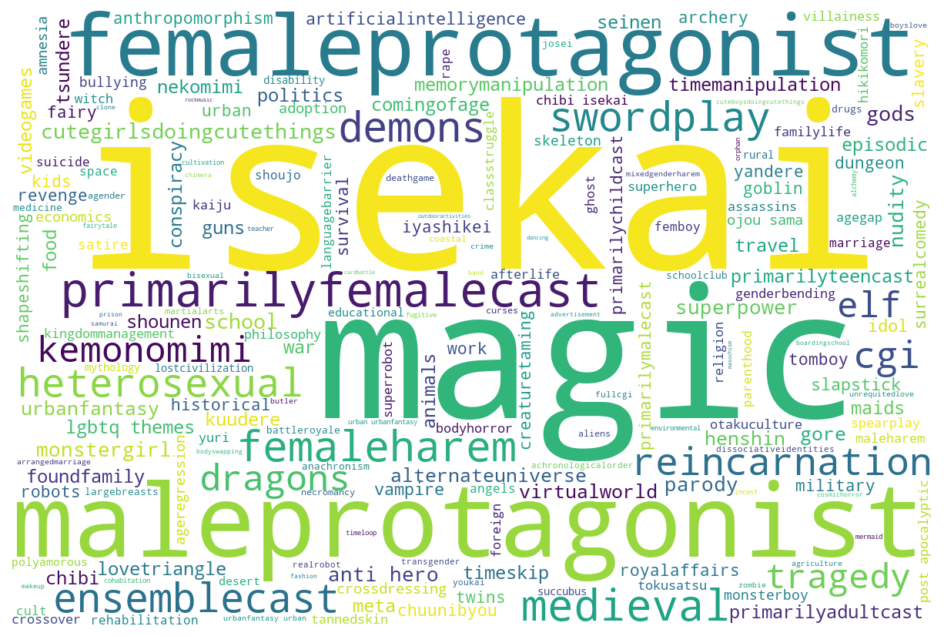

In [21]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

file_path = "./animation_data/anilist_anime_2016_2025_cleaned.csv"
df = pd.read_csv(file_path)
isekai_df = df[df["tags"].str.contains("Isekai", case=False, na=False)]

def clean_tags(tag_str):
    if pd.isna(tag_str):
        return ""
    tag_str = re.sub(r"[\[\]'\" ]", "", tag_str)
    tag_str = tag_str.replace("|", " ")
    return tag_str.lower()

isekai_df["clean_tags"] = isekai_df["tags"].apply(clean_tags)
vectorizer = TfidfVectorizer(
    max_features=500,
    stop_words="english"
)

tfidf_matrix = vectorizer.fit_transform(isekai_df["clean_tags"])
feature_names = vectorizer.get_feature_names_out()

tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).ravel()

tfidf_rank = pd.DataFrame({
    "word": feature_names,
    "score": tfidf_scores
}).sort_values(by="score", ascending=False)

wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color="white"
).generate(" ".join(isekai_df["clean_tags"]))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Predictions for Top Anime Releases in January 2026

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv('./animation_data/anilist_anime_2016_2025_cleaned.csv')
test_df = pd.read_csv('./animation_data/anime_winter_2026_cleaned.csv')

print(f"Training set size: {train_df.shape}")
print(f"test set size: {test_df.shape}")

# Data preprocessing functions
def extract_genres(genre_str):
    """Extracting the list of subject matter types."""
    if pd.isna(genre_str):
        return []
    try:
        if isinstance(genre_str, str):
            if '|' in genre_str:
                return [g.strip() for g in genre_str.split('|') if g.strip()]
            elif '[' in genre_str and ']' in genre_str:
                import ast
                try:
                    genres = ast.literal_eval(genre_str.replace('|', ','))
                    if isinstance(genres, list):
                        return [str(g).strip() for g in genres if str(g).strip()]
                except:
                    return []
        return []
    except:
        return []

def is_sequel(title):
    if pd.isna(title):
        return 0
    title = str(title).lower()
    sequel_keywords = ['2nd', '3rd', '2', 'second', 'third', 'season 2', 'season 3',
                      'part 2', 'part 3', 'sequel', '続編', '第2期', '第3期']
    return 1 if any(keyword in title for keyword in sequel_keywords) else 0

def get_studio_popularity(studio, studio_popularity_dict):
    if pd.isna(studio):
        return 0
    studio = str(studio).strip()
    if '[' in studio and ']' in studio:
        import ast
        try:
            studios = ast.literal_eval(studio)
            if isinstance(studios, list):
                return max([studio_popularity_dict.get(s.strip(), 0) for s in studios if s.strip()])
        except:
            return studio_popularity_dict.get(studio, 0)
    return studio_popularity_dict.get(studio, 0)

Training set size: (4374, 29)
test set size: (83, 15)


In [23]:
# Feature Engineering
# Calculate the average heat of the training set studio
studio_popularity = {}
for _, row in train_df.iterrows():
    studio = row.get('mainstudio', '')
    if pd.notna(studio) and studio:
        popularity = row.get('popularity', 0)
        if pd.notna(popularity):
            studio_popularity[studio] = studio_popularity.get(studio, []) + [popularity]

# Calculate the average popularity of each studio
for studio in studio_popularity:
    studio_popularity[studio] = np.mean(studio_popularity[studio])

# Prepare training data
X_train_features = []
y_train = []

# Create a genre type encoder
all_genres = set()
for genre_str in train_df['genres']:
    genres = extract_genres(genre_str)
    all_genres.update(genres)

genre_encoder = {genre: i for i, genre in enumerate(sorted(all_genres))}

# Extract training features
for _, row in train_df.iterrows():
    # Target variable
    popularity = row.get('popularity', 0)
    if pd.isna(popularity):
        continue
    
    # Feature extraction
    features = []
    
    # 1. Whether it is a sequel
    features.append(is_sequel(row.get('title_romaji', '')))
    
    # 2. Studio popularity
    studio = row.get('mainstudio', '')
    features.append(get_studio_popularity(studio, studio_popularity))
    
    # 3. Format
    format_type = str(row.get('format', 'TV')).strip()
    format_map = {'TV': 1, 'MOVIE': 2, 'OVA': 3, 'ONA': 4, 'SPECIAL': 5}
    features.append(format_map.get(format_type, 0))
    
    # 4. Number of episodes
    episodes = row.get('episodes', 0)
    features.append(episodes if pd.notna(episodes) else 0)
    
    # 5. Duration
    duration = row.get('duration', 0)
    features.append(duration if pd.notna(duration) else 0)
    
    # 6. Average score
    avg_score = row.get('averagescore', 0)
    features.append(avg_score if pd.notna(avg_score) else 0)
    
    # 7. Genre type features (one-hot encoded)
    genre_vector = [0] * len(genre_encoder)
    genres = extract_genres(row.get('genres', ''))
    for genre in genres:
        if genre in genre_encoder:
            genre_vector[genre_encoder[genre]] = 1
    
    features.extend(genre_vector)
    
    X_train_features.append(features)
    y_train.append(popularity)

# Prepare test data
X_test_features = []
test_ids = []
test_titles = []

for _, row in test_df.iterrows():
    test_ids.append(row.get('id', ''))
    test_titles.append(row.get('title', ''))
    
    features = []
    
    # 1. Whether it is a sequel
    features.append(is_sequel(row.get('title', '')))
    
    # 2. Studio popularity
    studio = row.get('studio', '') or row.get('studio_list', '')
    features.append(get_studio_popularity(studio, studio_popularity))
    
    # 3. Format
    format_type = str(row.get('format', 'TV')).strip()
    format_map = {'TV': 1, 'TV_SHORT': 1, 'MOVIE': 2, 'OVA': 3, 'ONA': 4, 'SPECIAL': 5}
    features.append(format_map.get(format_type, 0))
    
    # 4. Episodes (use durationmin as fallback)
    episodes = row.get('episodes', 0)
    if pd.isna(episodes) or episodes == 0:
        # If no episode info, try inferring from durationmin
        durationmin = row.get('durationmin', 0)
        episodes = 1 if pd.notna(durationmin) and durationmin > 0 else 0
    features.append(float(episodes) if pd.notna(episodes) else 0)
    
    # 5. Duration (use durationmin)
    duration = row.get('durationmin', 0)
    features.append(float(duration) if pd.notna(duration) else 0)
    
    # 6. Average score (may not exist in test set)
    avg_score = row.get('average_score', 0)
    features.append(float(avg_score) if pd.notna(avg_score) else 0)
    
    # 7. Genre type features
    genre_vector = [0] * len(genre_encoder)
    genres = extract_genres(row.get('genres', ''))
    for genre in genres:
        if genre in genre_encoder:
            genre_vector[genre_encoder[genre]] = 1
    
    features.extend(genre_vector)
    
    X_test_features.append(features)

# Convert to numpy arrays
X_train = np.array(X_train_features)
y_train = np.array(y_train)
X_test = np.array(X_test_features)

print(f"Training feature dimensions: {X_train.shape}")
print(f"Test feature dimensions: {X_test.shape}")

Training feature dimensions: (4374, 58)
Test feature dimensions: (83, 58)


In [24]:
# Data standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Training the model
# Splitting the training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

In [26]:
# Grid Search Optimization
# Defining the Parameter Grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5, 0.7],
    'bootstrap': [True, False]
}
# Create Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Create GridSearch object
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='r2',  # Use R² as the evaluation metric
    cv=5,  # 5-fold cross validation
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Execute grid search
print("Running grid search...")
grid_search.fit(X_train_split, y_train_split)

print("\nGrid search completed!")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation R² score: {grid_search.best_score_:.4f}")


Running grid search...
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits

Grid search completed!
Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation R² score: 0.6045


In [27]:
# Use the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_val_pred = best_rf_model.predict(X_val_split)

mse = mean_squared_error(y_val_split, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val_split, y_val_pred)
r2 = r2_score(y_val_split, y_val_pred)

print("\nBest model performance on the validation set:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² score: {r2:.4f}")


Best model performance on the validation set:
Mean Squared Error (MSE): 2710211864.58
Root Mean Squared Error (RMSE): 52059.70
Mean Absolute Error (MAE): 20594.71
R² score: 0.5465


In [28]:
# Cross-validation evaluation
print("\nPerforming 5-fold cross-validation...")
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, 
                           cv=5, scoring='r2', n_jobs=-1)
print(f"Cross-validation R² score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Retrain the best model using the full training data
best_rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_test_pred = best_rf_model.predict(X_test_scaled)



Performing 5-fold cross-validation...
Cross-validation R² score: 0.4174 (±0.3444)


In [29]:
# Analyze results
results_df = pd.DataFrame({
    'id': test_ids,
    'title': test_titles,
    'predicted_popularity': y_test_pred,
    'studio': test_df['studio'],
    'genres': test_df['genres'],
    'start_date': test_df['start_date']
})

# Sort and display Top 20
top_20 = results_df.sort_values('predicted_popularity', ascending=False).head(20)
print("\n" + "="*80)
print("Top 20 Most Likely Hit Anime of Winter 2026 (Based on Grid Search Optimized Model):")
print("="*80)
for i, (_, row) in enumerate(top_20.iterrows(), 1):
    print(f"{i:2d}. {row['title'][:40]:<40} | Predicted Popularity: {row['predicted_popularity']:7.1f}")



Top 20 Most Likely Hit Anime of Winter 2026 (Based on Grid Search Optimized Model):
 1. Fate/strange Fake                        | Predicted Popularity: 50273.4
 2. Jigokuraku 2nd Season                    | Predicted Popularity: 34273.2
 3. Eris no Seihai                           | Predicted Popularity: 28170.6
 4. Mato Seihei no Slave 2                   | Predicted Popularity: 24646.7
 5. Jingai Kyoushitsu no Ningengirai Kyoushi | Predicted Popularity: 23794.1
 6. Okiraku Ryoushu no Tanoshii Ryouchi Boue | Predicted Popularity: 22871.4
 7. Jujutsu Kaisen: Shimetsu Kaiyuu - Zenpen | Predicted Popularity: 22677.5
 8. [Oshi no Ko] 3rd Season                  | Predicted Popularity: 22236.5
 9. Sousou no Frieren 2nd Season             | Predicted Popularity: 19472.2
10. 29-sai Dokushin Chuuken Boukensha no Nic | Predicted Popularity: 18883.4
11. "Omae Gotoki ga Maou ni Kateru to Omou n | Predicted Popularity: 18802.1
12. Enen no Shouboutai: San no Shou Part 2   | Predicted Popularity:

In [30]:
# save results to CSV
results_df_sorted = results_df.sort_values('predicted_popularity', ascending=False)
results_df_sorted.to_csv('2026_winter_anime_predictions_gridsearch.csv', index=False)

In [31]:
# Studio performance
print("\n" + "="*80)
print("Studio analysis:")
print("="*80)

# Compute the average predicted popularity for each studio
studio_stats = []
for studio_name in studio_popularity.keys():
    studio_anime = results_df_sorted[results_df_sorted['studio'].astype(str).str.contains(studio_name, na=False)]
    if len(studio_anime) > 0:
        studio_stats.append({
            'studio': studio_name,
            'avg_predicted_popularity': studio_anime['predicted_popularity'].mean(),
            'count': len(studio_anime),
            'studio_popularity_score': studio_popularity.get(studio_name, 0)
        })

studio_stats_df = pd.DataFrame(studio_stats)
studio_stats_df = studio_stats_df.sort_values('avg_predicted_popularity', ascending=False)

print("\nStudio average predicted popularity ranking (produced at least 1 anime):")
print("-"*60)
for i, (_, row) in enumerate(studio_stats_df.head(15).iterrows(), 1):
    print(f"{i:2d}. {row['studio'][:30]:<30} | Avg Popularity: {row['avg_predicted_popularity']:6.1f} | Count: {row['count']:2d}")

# 17. Model evaluation report
print("\n" + "="*80)
print("Model Performance Summary Report")
print("="*80)
print(f"Model type: Random Forest Regressor (Grid Search Optimized)")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Training R² score: {r2_score(y_train, best_rf_model.predict(X_train_scaled)):.4f}")
print(f"Validation R² score: {r2:.4f}")
print("="*80)


Studio analysis:

Studio average predicted popularity ranking (produced at least 1 anime):
------------------------------------------------------------
 1. MAPPA                          | Avg Popularity: 28475.3 | Count:  2
 2. Ashi Productions               | Avg Popularity: 28170.6 | Count:  1
 3. A-1 Pictures                   | Avg Popularity: 25453.8 | Count:  2
 4. Hayabusa Film                  | Avg Popularity: 24646.7 | Count:  1
 5. Passione                       | Avg Popularity: 24646.7 | Count:  1
 6. Asread                         | Avg Popularity: 23794.1 | Count:  1
 7. NAZ                            | Avg Popularity: 22871.4 | Count:  1
 8. Doga Kobo                      | Avg Popularity: 22236.5 | Count:  1
 9. MADHOUSE                       | Avg Popularity: 19472.2 | Count:  1
10. HORNETS                        | Avg Popularity: 18883.4 | Count:  1
11. A.C.G.T.                       | Avg Popularity: 18802.1 | Count:  1
12. David Production               | Avg Pop